### 🚀 Project Intro: Build a Multivariate Linear Regression Model from Scratch

Welcome! 👋  
In this project, we’re not just training a model — we’re **building it ourselves** step by step.

Instead of using machine learning libraries like `scikit-learn`, we wrote our own code to:
- 📦 Initialize weights  
- 🧠 Predict outcomes  
- 📉 Compute cost  
- 🔁 Apply gradient descent

Why?  
Because understanding how linear regression really works under the hood gives us full control and insight.

We used a small dataset just to test and train our model — the main focus was **the method**, not the data.

Let’s dive in! 💡

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 🔍 Data Preprocessing Steps

In this section, we prepare the dataset for training the multivariable linear regression model.

#### ✅ 1. Loaded the Dataset
- Imported data containing features like:
  - Hours Studied
  - Previous Scores
  - Extracurricular Activities (Yes/No)
  - Sleep Hours
  - Sample Question Papers Practiced
  - Target: Performance Index

#### ✅ 2. Converted Categorical to Numerical
- Converted the "Extracurricular Activities" column from `"Yes"`/`"No"` to binary values `1` and `0`.

#### ✅ 3. Checked for Missing Values
- Used `data.isnull().sum()` to confirm there are **no missing values** in any column.

The dataset is now fully numeric and clean — ready for further preprocessing (like normalization) and model training.


In [2]:
data = pd.read_csv("d:\\data\Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
data["Extracurricular Activities"] = data["Extracurricular Activities"].replace({"Yes":1,'No':0})
data["Extracurricular Activities"] = data["Extracurricular Activities"].astype("int")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [4]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### 📈 Correlation Analysis – Feature vs. Target

To understand how each input feature relates to the target variable (**Performance Index**), we calculated the Pearson correlation coefficient between each feature and the target.



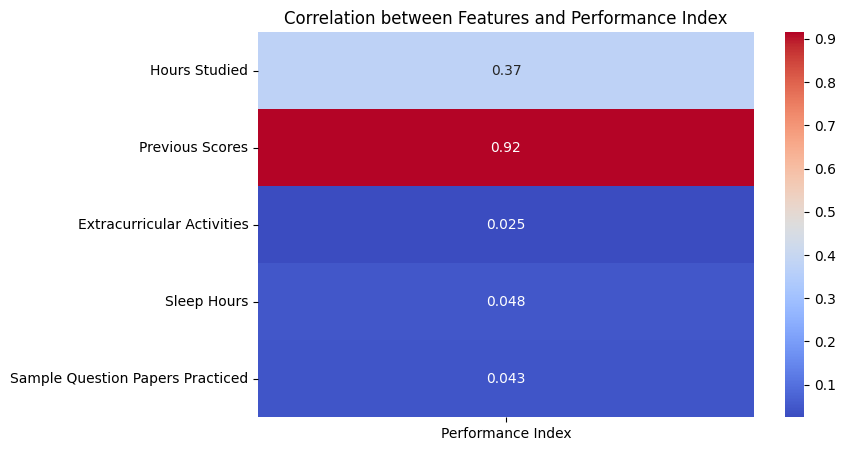

In [5]:
corr_data = data.copy()

# calculate the corr
corr_matrix = corr_data.corr()

# draw (Heatmap)
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix[["Performance Index"]].drop("Performance Index"), annot=True, cmap="coolwarm")
plt.title("Correlation between Features and Performance Index")
plt.show()

#### 🔍 Results:

| Feature                          | Correlation with Performance Index | Interpretation |
|----------------------------------|------------------------------------|----------------|
| **Previous Scores**              | `0.915`                            | Strong positive linear relationship |
| **Hours Studied**                | `0.374`                            | Weak to moderate positive correlation |
| **Extracurricular Activities**   | `0.025`                            | Very weak / negligible correlation |
| **Sleep Hours**                  | `0.048`                            | Very weak / negligible correlation |
| **Sample Question Papers Practiced** | `0.043`                        | Very weak / negligible correlation |

#### ✅ Observations:
- **Previous Scores** show the strongest correlation with performance, making it the most influential individual predictor.
- Other features (like Sleep Hours, Extracurricular Activities) show little to no linear relationship with the target.
- However, low correlation does **not necessarily mean the feature is useless** — some variables may still contribute when combined with others or when relationships are nonlinear.

> Therefore, we will keep all features for now and continue with model training to see how they interact in a multivariable setting.

### ⚙️ Feature Normalization (Standardization)

Before training our multivariable linear regression model, we perform **feature normalization** to ensure that all features contribute equally to the cost function.

#### 📌 Why Normalize?
- Features in our dataset have different scales (e.g., "Hours Studied" vs. "Previous Scores").
- Gradient descent converges faster when input features are on a similar scale.
- Prevents features with large values from dominating the model training.

#### 📐 What We Do:
We use **standardization**, which transforms each feature as follows:

$$
x_{\text{norm}} = \frac{x - \mu}{\sigma}
$$

Where:  
- $ \mu $ = mean of the feature  
- $ \sigma $ = standard deviation of the feature    

This results in:
- Mean = 0  
- Standard Deviation = 1

> **Note:** Normalization is applied only to input features `X`, not the target variable `y`.

We store the `mean` and `std` of each feature so they can be reused when normalizing new/unseen data later.


In [6]:
X = data.iloc[: , 0:-1]
Y = data.iloc[:,-1]

In [7]:
# mean
x_mean = X.mean()
# std 
x_std = X.std()
#normalization 
X_normalize= (X - x_mean) /x_std 
X_normalize.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775149,1.704090,1.010404,1.456132,-1.249691
1,-0.383461,0.723876,-0.989604,-1.492220,-0.900937
2,1.161352,-1.063573,1.010404,0.276791,-0.900937
3,0.002742,-1.005913,1.010404,-0.902549,-0.900937
4,0.775149,0.320259,-0.989604,0.866462,0.145326


### 🧱 Step 1: Initialize Weights and Bias

Before training the linear regression model using Gradient Descent, we need to initialize the model parameters:

- `w`: A weight vector of zeros with shape `(n_features,)`
- `b`: A scalar bias term initialized to 0

These values will be updated iteratively during the training process.

In [8]:
def initialize_weights(X):
    w = np.zeros(X.shape[1])
    b=0
    return w,b

### 📉 Step 2: Compute Cost Function (Mean Squared Error)

To evaluate how well our current model performs, we use the **Mean Squared Error (MSE)** cost function. This function measures the average squared difference between the predicted values and the actual target values.

#### Formula:
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

Where:
- $m$: number of training examples  
- $\hat{y} = Xw + b$: predicted values  
- $y$: true values  

The factor $\frac{1}{2}$ simplifies the derivative during gradient calculation.

In [9]:
def compute_cost(X, y, w=np.zeros(X.shape[1]), b=0):
    y_pred = np.dot(X, w) + b
    diff = np.power((y_pred - y), 2)
    cost = np.sum(diff) / (2 * len(y)) 
    return cost
    

### 🧮 Step 3: Compute Gradients

To update our model parameters (weights and bias), we need to calculate the gradients of the cost function with respect to those parameters. These gradients indicate the direction in which the cost increases the most — and we move in the opposite direction to minimize the cost.

#### 🧾 Gradient Formulas:

Given:
- $\hat{y} = Xw + b$
- $m$: number of training examples

We compute:

- **Gradient with respect to weights**:
  $$
  \frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)
  $$

- **Gradient with respect to bias**:
  $$
  \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
  $$

These gradients are then used in the gradient descent step to update the weights and bias in the direction that minimizes the cost.


In [10]:
def compute_gradients(X, y, w, b):
    # Step 1: Compute predictions
    y_pred = np.dot(X, w) + b

    # Step 2: Compute the difference between predictions and true values
    diff = y_pred - y
    m = len(y)  # Number of training examples

    # Step 3: Compute the gradients
    derv_w = (1 / m) * np.dot(X.T, diff)  # Gradient w.r.t weights
    derv_b = (1 / m) * np.sum(diff)       # Gradient w.r.t bias
    
    return derv_w, derv_b
    

### 🔁 Step 4: Gradient Descent

To minimize the cost function, we use **Gradient Descent**, an iterative optimization algorithm that updates the model parameters (weights and bias) in the opposite direction of the gradient.

#### 🧾 Update Rules:

- For weights:
  $$
  w := w - \alpha \cdot \frac{\partial J}{\partial w}
  $$
  
- For bias:
  $$
  b := b - \alpha \cdot \frac{\partial J}{\partial b}
  $$

Where:
- $w$, $b$ are the model parameters  
- $\alpha$ is the learning rate  
- $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ are the gradients of the cost function with respect to the weights and bias  

#### 📌 Function Details:

- `X`, `y`: input features and target
- `w`, `b`: initial weights and bias
- `learning_rate`: step size for each update
- `iterations`: number of times to update the parameters
- `cost_history`: keeps track of cost after each iteration for analysis

The function returns:
- Optimized weights `w`
- Optimized bias `b`
- History of cost values for plotting convergence



In [11]:
def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = [] 
    
    for i in range(iterations):
        derv_w, derv_b = compute_gradients(X, y, w, b)  # typo fixed
        
        w = w - learning_rate * derv_w 
        b = b - learning_rate * derv_b 
        
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
    
    return w, b, cost_history

### 🔀 Step 5: Train-Test Split

To evaluate the performance of our model on unseen data, we split our dataset into two parts:

- **Training Set**: Used to train the model (e.g., 80% of the data)
- **Testing Set**: Used to evaluate model performance (e.g., 20% of the data)

We use `train_test_split` from `sklearn.model_selection` to perform the split.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalize, Y, test_size=0.2, random_state=42)

### 🧪 Step 6: Model Training Using Gradient Descent

We now train our multivariable linear regression model using the gradient descent algorithm we implemented earlier. The training process involves:

- Initializing the weights and bias to zero
- Iteratively updating the parameters to minimize the cost function (Mean Squared Error)

In [13]:
w,b = initialize_weights(X_train)
w, b, cost_history = gradient_descent(X_train, y_train, w, b, 0.001, 5000)
w,b

(array([ 7.32337799, 17.52465009,  0.30428018,  0.81718049,  0.57824791]),
 54.87052838829294)

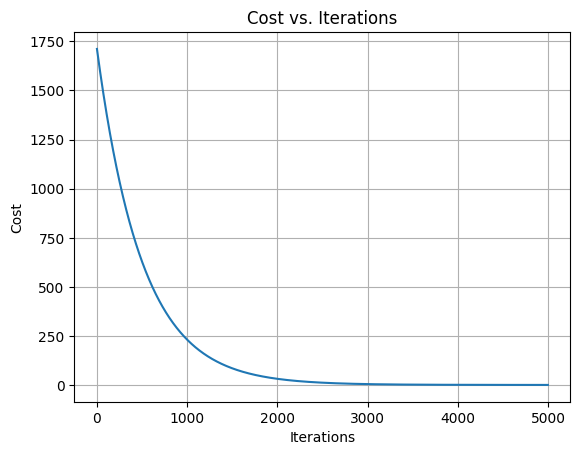

In [14]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.grid(True)
plt.show()

 **evalute the model by MSE ** 

In [15]:
compute_cost(X_test, y_test, w, b)

2.1024475874154023

### 📊 Actual vs Predicted Values (Visualization)

To evaluate the performance of our trained linear regression model, we compare the predicted values to the actual values from the test dataset.

We visualize the first 30 samples in the test set to check how closely the model's predictions align with the true target values.

- **X-axis**: Sample Number (First 30 Test Samples)  
- **Y-axis**: Target Variable — *Performance Index*  
- **Markers**:
  - 🔵 **Circle (`o`)** for Actual values  
  - ❌ **Cross (`x`)** for Predicted values

The closer the predicted values are to the actual ones, the more accurate the model is.

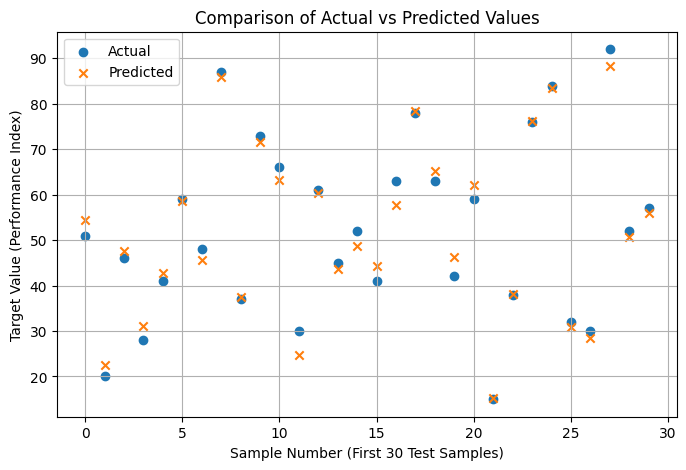

In [16]:
y_pred = np.dot(X_test, w) + b

#visualize
plt.figure(figsize=(8, 5))
plt.scatter(range(30), y_test[:30], label="Actual", marker='o')
plt.scatter(range(30), y_pred[:30], label="Predicted", marker='x')
plt.title("Comparison of Actual vs Predicted Values")  
plt.xlabel("Sample Number (First 30 Test Samples)")    
plt.ylabel("Target Value (Performance Index)")        
plt.legend()
plt.grid(True)
plt.show()


### 🤖 Comparison with Scikit-learn's LinearRegression

To benchmark our custom linear regression model, we trained a model using `sklearn.linear_model.LinearRegression` on the same training data. We compared predictions, plotted them, and evaluated key performance metrics.

This comparison helps validate that our manual implementation is mathematically sound and performs similarly to a proven library.

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_sklearn = model.predict(X_test)


print("Custom Model:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

print("\nSklearn Model:")
print("MSE:", mean_squared_error(y_test, y_pred_sklearn))
print("MAE:", mean_absolute_error(y_test, y_pred_sklearn))
print("R²:", r2_score(y_test, y_pred_sklearn))

Custom Model:
MSE: 4.2048951748308045
MAE: 1.6332879829176454
R²: 0.988653361958469

Sklearn Model:
MSE: 4.082628398521852
MAE: 1.611121346312304
R²: 0.9889832909573145


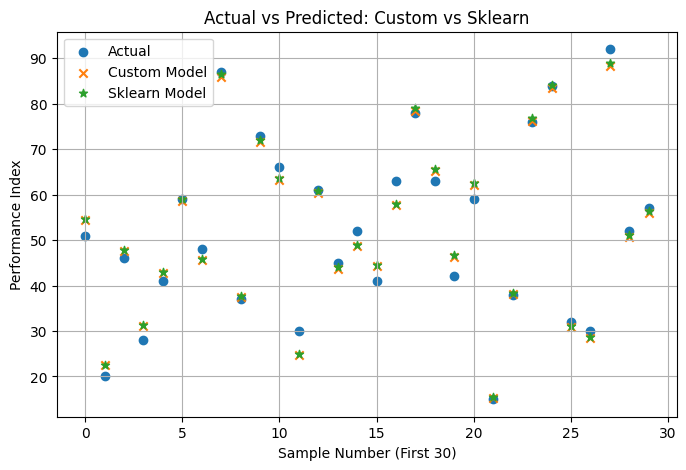

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(range(30), y_test[:30], label="Actual", marker='o')
plt.scatter(range(30), y_pred[:30], label="Custom Model", marker='x')
plt.scatter(range(30), y_pred_sklearn[:30], label="Sklearn Model", marker='*')
plt.title("Actual vs Predicted: Custom vs Sklearn")
plt.xlabel("Sample Number (First 30)")
plt.ylabel("Performance Index")
plt.legend()
plt.grid(True)
plt.show()

### ✅ Model Performance Comparison

We compared the performance of our **custom-built linear regression model** with **Scikit-learn's `LinearRegression`** implementation. Both models were trained and evaluated on the same dataset.

| Metric          | Custom Model | Sklearn Model |
|-----------------|--------------|----------------|
| MSE             | 4.20         | 4.08           |
| MAE             | 1.63         | 1.61           |
| R² Score        | 0.9886       | 0.9890         |

#### 🧠 Observations:
- The custom model performs **almost identically** to scikit-learn's model.
- Slight differences are due to optimization precision and implementation differences.
- This confirms that our gradient descent logic and math are implemented correctly.


### 👨‍💻 Author

**Mohamed waleed (Elmasry)**  
Aspiring Data Scientist  
[GitHub](https://github.com/Mohamed-Elmasry16) | [LinkedIn](https://www.linkedin.com/in/mohamed-elmasry16)

This notebook was created as part of my personal learning journey to implement Linear Regression and Gradient Descent **from scratch**.

---